<a href="https://colab.research.google.com/github/Sravani-05/DLAssignment_3/blob/main/NN_Tensorflow_variations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers.legacy import SGD

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Generate non-linear data

n = 500
dim = 3
x = tf.random.uniform([n, dim], dtype=tf.float32)
print('Input shape =', x.shape)

Input shape = (500, 3)


In [3]:
# Initialize weights and bias

weights = tf.transpose(tf.Variable([[2.0, -3.0, 1.0]], dtype=tf.float32))
bias = tf.Variable([8], dtype=tf.float32)
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = tf.einsum('ij, jk -> ik', (x**3),  weights) + tf.einsum('ij, jk -> ik', (x**2),  weights) + tf.einsum('ij, jk -> ik', x, weights) + bias
print('Function output shape =', y_true.shape)

Weights shape = (3, 1)
Bias shape = (1,)
Function output shape = (500, 1)


In [4]:
# Hyperparamter initializations

input_dim = dim
output_dim = 1
hidden_dim = 16

learning_rate = 0.01
num_epochs = 50

#### Non-linear regression using tensorflow low level API

In [5]:
# Weights and biases for each of the layers
W1 = tf.Variable(tf.random.normal([input_dim, hidden_dim]))
b1 = tf.Variable(tf.zeros([hidden_dim]))
W2 = tf.Variable(tf.random.normal([hidden_dim, hidden_dim]))
b2 = tf.Variable(tf.zeros([hidden_dim]))
W3 = tf.Variable(tf.random.normal([hidden_dim, output_dim]))
b3 = tf.Variable(tf.zeros([output_dim]))

# Forward pass
def forward(X):
  h1 = tf.nn.relu(tf.matmul(tf.convert_to_tensor(x), W1) + b1)
  h2 = tf.nn.relu(tf.matmul(h1, W2) + b2)
  y_pred = tf.matmul(h2, W3) + b3
  return y_pred

# Loss function
def loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

# define the optimizer
optimizer = tf.optimizers.SGD(learning_rate)

# define the training step
def train(x, y_true):
  with tf.GradientTape() as tape:
    y_pred = forward(x)
    loss_value = loss(y_true, y_pred)
  gradients = tape.gradient(loss_value, [W1, b1, W2, b2, W3, b3])
  optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))
  return loss_value

# train the model
loss_ = []
for epoch in range(num_epochs):
    loss_value = train(x, y_true)
    loss_.append(loss_value)
    print(f"Epoch {epoch}: Loss = {loss_value}")

Epoch 0: Loss = 243.22125244140625
Epoch 1: Loss = 84.60689544677734
Epoch 2: Loss = 71.79385375976562
Epoch 3: Loss = 45.1818733215332
Epoch 4: Loss = 26.566213607788086
Epoch 5: Loss = 14.55003833770752
Epoch 6: Loss = 11.18647289276123
Epoch 7: Loss = 9.96212387084961
Epoch 8: Loss = 8.909977912902832
Epoch 9: Loss = 7.995311737060547
Epoch 10: Loss = 7.1994853019714355
Epoch 11: Loss = 6.5102434158325195
Epoch 12: Loss = 5.918332576751709
Epoch 13: Loss = 5.3923163414001465
Epoch 14: Loss = 4.923163414001465
Epoch 15: Loss = 4.496094703674316
Epoch 16: Loss = 4.107413291931152
Epoch 17: Loss = 3.7528674602508545
Epoch 18: Loss = 3.428804874420166
Epoch 19: Loss = 3.1331522464752197
Epoch 20: Loss = 2.8638863563537598
Epoch 21: Loss = 2.6204452514648438
Epoch 22: Loss = 2.3993983268737793
Epoch 23: Loss = 2.197765588760376
Epoch 24: Loss = 2.015470504760742
Epoch 25: Loss = 1.8509708642959595
Epoch 26: Loss = 1.7023100852966309
Epoch 27: Loss = 1.5691300630569458
Epoch 28: Loss = 1.

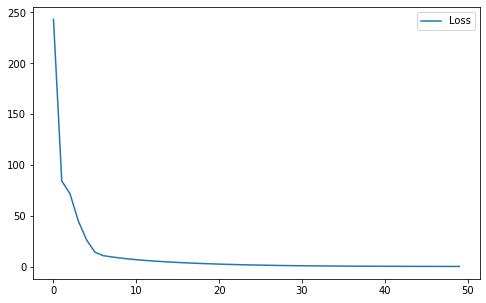

In [6]:
# Plot epoch vs loss

plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

#### Using builtin layers

In [7]:
# Define linear layer class

class Linear(Layer):
  def __init__(self, units):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.wts = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
      self.bias = self.add_weight(shape=(self.units,), initializer='random_normal', trainable=True)

  def call(self, inputs):
      return tf.einsum('ij, jk -> ik', inputs, self.wts) + self.bias

In [8]:
# Non-linear regression model

class Model(Layer):
  def __init__(self):
      super(Model, self).__init__()
      self.input_layer = Linear(input_dim)
      self.hidden_1 = Linear(hidden_dim)
      self.hidden_2 = Linear(hidden_dim)
      self.output_layer = Linear(output_dim)

  def call(self, input, training=None):
      x = self.input_layer(input)
      x = tf.nn.relu(x)
      x = self.hidden_1(x)
      x = tf.nn.relu(x)
      x = self.hidden_2(x)
      x = tf.nn.relu(x)
      x = self.output_layer(x)
      return x

In [9]:
# Initialize model and train
model = Model()
y_pred = model(x, training=True)

#### Using tensorflow functional API

In [10]:
# Non-linear regression model (Functional API)

x_ = tf.keras.layers.Input(shape=(input_dim,))
h1 = tf.keras.layers.Dense(hidden_dim, activation='relu')(x_)
h2 = tf.keras.layers.Dense(hidden_dim, activation='relu')(h1)
y = tf.keras.layers.Dense(output_dim, activation=None)(h2)

In [11]:
# Define optimizer and loss function

optimizer = SGD(lr=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
model = tf.keras.Model(inputs=x_, outputs=y)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Compile and fit model

model.compile(optimizer=optimizer, loss=loss)
model.fit(x, y_true, epochs=num_epochs)
y_pred = model.predict(x)

Epoch 1/50
16/16 [==============================] - 1s 13ms/step - loss: 28.3262
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 4.2604
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.2176
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6525
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8270
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6019
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4791
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4314
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4344
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4300
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3858
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.3626
Epoch 13/50
16/16 [============================

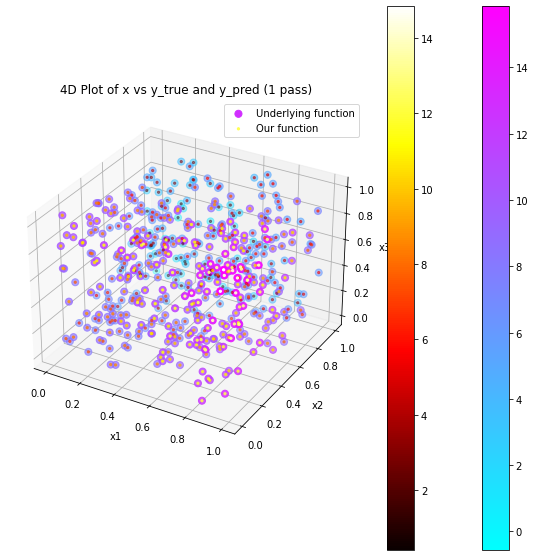

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred, cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()

#### Using tensoflow high level API - Keras

In [15]:
# Non-linear regression model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_dim, input_dim=input_dim, activation=tf.nn.relu),
    tf.keras.layers.Dense(hidden_dim, activation=tf.nn.relu),
    tf.keras.layers.Dense(output_dim, activation=None)
])

In [16]:
# Define optimizer and loss function

optimizer = SGD(lr=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

In [17]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss)

# Model training
history = model.fit(x, y_true, epochs=num_epochs)

Epoch 1/50
16/16 [==============================] - 0s 2ms/step - loss: 34.4883
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 6.8035
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 2.6281
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 1.0026
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7269
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5847
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5223
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5316
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4988
Epoch 10/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4776
Epoch 11/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5588
Epoch 12/50
16/16 [==============================] - 0s 2ms/step - loss: 0.4411
Epoch 13/50
16/16 [=============================

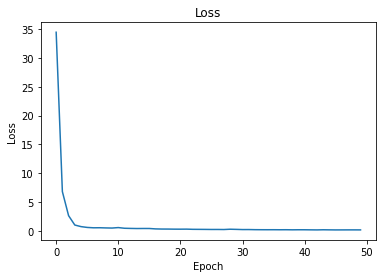

In [18]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()